In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# wczytanie zbioru
df = pd.read_csv('adult_train.tab', sep='\t')
df = df.drop(df.index[0:2])
print(df['y'].value_counts()) 

# wybieramy jako 1 rzadsza klasę (trudniejszą do przepowiedzenia)
df['y'][df['y'] == '>50K'] = 1
df['y'][df['y'] == '<=50K'] = 0
df.head()

<=50K    24686
>50K      7832
Name: y, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
2,39.000,State-gov,77516.000,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000,0.000,40.000,United-States,0
3,50.000,Self-emp-not-inc,83311.000,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000,0.000,13.000,United-States,0
4,38.000,Private,215646.000,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000,0.000,40.000,United-States,0
5,53.000,Private,234721.000,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000,0.000,40.000,United-States,0
6,28.000,Private,338409.000,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000,0.000,40.000,Cuba,0


In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# osobne ramki danych na dane numeryczne i kategoryczne
df_num = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
df_cat = df[['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]

# kodowanie danych kategorycznych zgodnie z konwencją OneHotEncoder
enc = OneHotEncoder()
x_cat = df_cat.values
enc.fit(df_cat)
x_cat = enc.transform(x_cat)
# transform zwraca macierz rzadką, przed ponownym wczytaniem do data frame, muszę wywołać toarray()
df_cat = pd.DataFrame(x_cat.toarray(), columns = enc.get_feature_names())

# resetuje indexy w ramkach, żeny sprawnie połączyć
df_cat = df_cat.reset_index(drop=True)
df_num = df_num.reset_index(drop=True)

# nowa, połączona ramka danych z samymi zmiennymi numerycznymi
df_new = pd.concat((df_cat, df_num), axis=1)
print(df_num.shape)
print(df.shape)
df_new.head()

(32518, 6)
(32518, 15)


,x0_?,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_Divorced,...,x6_Trinadad&Tobago,x6_United-States,x6_Vietnam,x6_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,39.000,77516.000,13.000,2174.000,0.000,40.000
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50.000,83311.000,13.000,0.000,0.000,13.000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,38.000,215646.000,9.000,0.000,0.000,40.000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,53.000,234721.000,7.000,0.000,0.000,40.000
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.000,338409.000,13.000,0.000,0.000,40.000


In [4]:
# przygotowanie zbioru uczącego, testowego
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# przygotowanie x
x = df_new.values

#skalowanie - konieczne aby algorytm 'gradient descent' sprawnie zbiegał
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# przygotowanie y
lab_enc = LabelEncoder()
y = df['y']
y = lab_enc.fit_transform(y)

# podział na zbiór treningowy, uczący
x_train, x_test, y_train, y_test = train_test_split(x, y)



In [ ]:
# przeszukanie przestrzeni hiperparametrów
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score)
param_grid = {
    'alpha': [0.1, 0.01, 0.001],
    'hidden_layer_sizes': [(7, 7, 7), (4, 4, 4), (2, 2, 2)]
}
grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring=f1_scorer, cv=5)
grid_search.fit(x, y)

In [21]:
# wybranie optymalnego zestawu hiperparametrów
grid_search.best_params_
# widzimy, że preferowana mocna regularyzacja i mniej skomplikowana sieć

{'alpha': 0.1, 'hidden_layer_sizes': (4, 4, 4)}

In [12]:
# klasyfikacja na tych hiperparametrach, które zwrócił GridSearch
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(4, 4, 4), alpha=0.1, max_iter=1000)
classifier .fit(x_train, y_train)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [13]:
# walidacja modelu
from sklearn.metrics import classification_report, f1_score
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6178
           1       0.71      0.64      0.67      1952

    accuracy                           0.85      8130
   macro avg       0.80      0.78      0.79      8130
weighted avg       0.85      0.85      0.85      8130

0.6724371111712198


In [9]:
# wykresy uczenia
from sklearn.metrics import mean_squared_error
classifier = MLPClassifier(hidden_layer_sizes=(4, 4, 4), alpha=0.1, max_iter=1000)
measure = mean_squared_error
measure_train = []
measure_test = []
n_train_growing = [1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000]
for n_train in n_train_growing:
    x_train_sub = x_train[:n_train, :]
    y_train_sub = y_train[:n_train]
    classifier .fit(x_train_sub, y_train_sub)
    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)
    measure_train.append(measure(y_train, y_train_pred))
    measure_test.append(measure(y_test, y_test_pred))

''

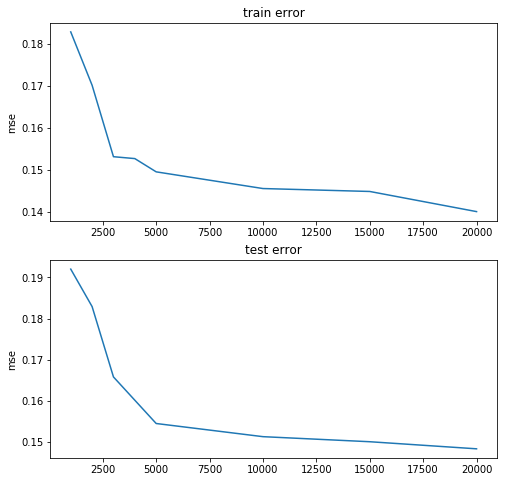

In [11]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(n_train_growing, measure_train)
plt.ylabel('mse')
plt.title('train error')

plt.subplot(2,1,2)
plt.plot(n_train_growing, measure_test)
plt.ylabel('mse')
plt.title('test error')
;

In [ ]:
# widzimy, że wraz ze wzrostem liczebności próby uczącej, maleje błąd zarówno na próbie uczącej jak i testowej.
# wygląda na to, że wszystko robimy dobrze. Można mieć nadzieję, że wraz z napływem nowych danych, 
# wynik się będzie poprawiał

# jeżeli dostalibyśmy dodatkowe dane (np. jeszcze 20 tys.) i widać by było wypłaszczenie (brak dalszego spadku błędu)
# to by znaczyło, że potrzebujemy lepsze zmienne lub lepszy model

# na przyszłość warto spróbować pogrupować kraje w jakieś większe grupy, np. odpowiadające śr. zamożności